<a href="https://colab.research.google.com/github/MarcelahCaetanoh/Projeto-2-Jornada-DS/blob/main/Projeto_2_DS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns


pd.set_option('display.max_rows' , None)
pd.set_option('display.max_columns' , None)

pd.set_option('display.float_format', lambda x: '%.2f' % x)



In [2]:
import pandas as pd
from google.colab import drive

drive.mount ('/content/drive')

Mounted at /content/drive


In [3]:
df_seguro = pd.read_csv('/content/drive/My Drive/Colab Notebooks/insurance.csv')
df_seguro.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.90,0,yes,southwest,16884.92
1,18,male,33.77,1,no,southeast,1725.55
2,28,male,33.00,3,no,southeast,4449.46
3,33,male,22.70,0,no,northwest,21984.47
4,32,male,28.88,0,no,northwest,3866.86


In [4]:
df_seguro.shape

(1338, 7)

In [5]:
df_seguro.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [6]:
df_seguro.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [7]:
df_seguro.describe()

,age,bmi,children,charges
count,1338.00,1338.00,1338.00,1338.00
mean,39.21,30.66,1.09,13270.42
std,14.05,6.10,1.21,12110.01
min,18.00,15.96,0.00,1121.87
25%,27.00,26.30,0.00,4740.29
50%,39.00,30.40,1.00,9382.03
75%,51.00,34.69,2.00,16639.91
max,64.00,53.13,5.00,63770.43


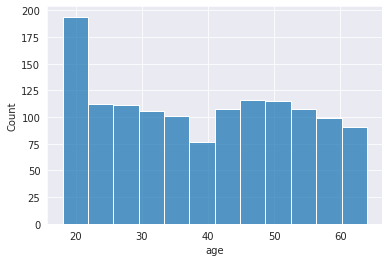

In [8]:
sns.set_style("darkgrid")
plt.tight_layout()

sns.histplot(data=df_seguro, x='age')

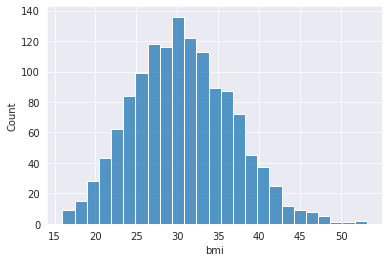

In [9]:
sns.set_style("darkgrid")
plt.tight_layout()

sns.histplot(data=df_seguro, x='bmi')

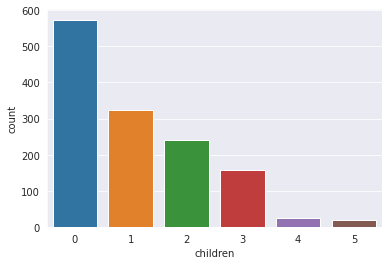

In [10]:
sns.set_style("darkgrid")
plt.tight_layout()

sns.countplot(data=df_seguro, x='children')

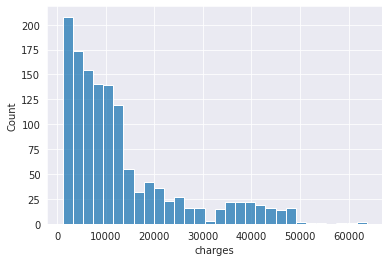

In [11]:
sns.histplot(data=df_seguro, x='charges')

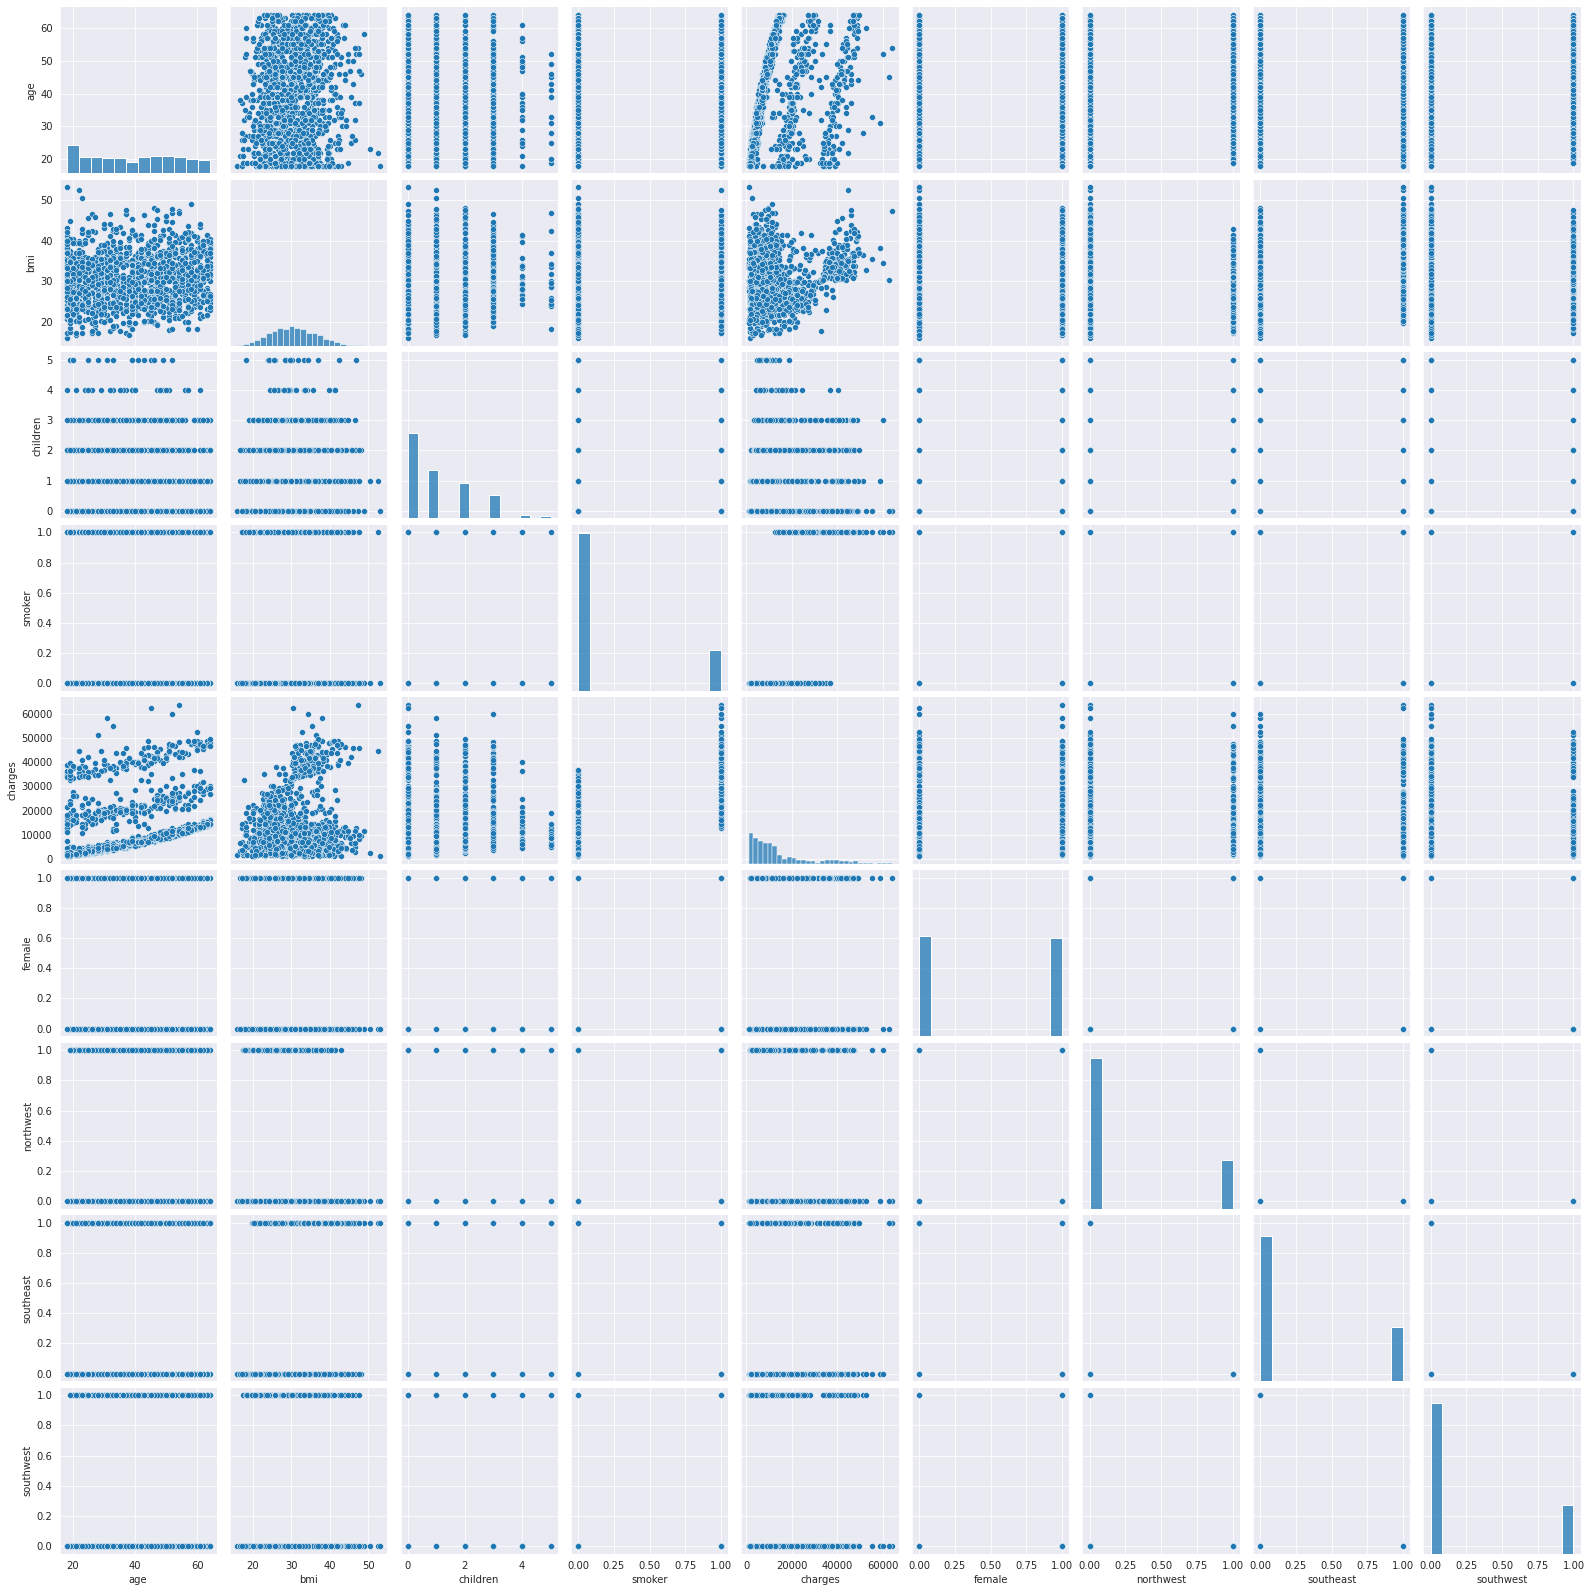

In [37]:
sns.pairplot(data=df_seguro)

In [13]:
df_seguro['female'] = df_seguro['sex'].map({'female' : 1, 'male' : 0})
df_seguro['smoker'] = df_seguro['smoker'].map({'yes' : 1, 'no' : 0})
df_seguro.head()

,age,sex,bmi,children,smoker,region,charges,female
0,19,female,27.90,0,1,southwest,16884.92,1
1,18,male,33.77,1,0,southeast,1725.55,0
2,28,male,33.00,3,0,southeast,4449.46,0
3,33,male,22.70,0,0,northwest,21984.47,0
4,32,male,28.88,0,0,northwest,3866.86,0


In [14]:
df_seguro = df_seguro.drop('sex' , axis=1)
df_seguro.head()

,age,bmi,children,smoker,region,charges,female
0,19,27.90,0,1,southwest,16884.92,1
1,18,33.77,1,0,southeast,1725.55,0
2,28,33.00,3,0,southeast,4449.46,0
3,33,22.70,0,0,northwest,21984.47,0
4,32,28.88,0,0,northwest,3866.86,0


In [15]:
colunas_regiao = pd.get_dummies(df_seguro['region'], drop_first=True)
colunas_regiao.head()

,northwest,southeast,southwest
0,0,0,1
1,0,1,0
2,0,1,0
3,1,0,0
4,1,0,0


In [16]:
pd.concat([df_seguro, colunas_regiao], axis=1) .head()

,age,bmi,children,smoker,region,charges,female,northwest,southeast,southwest
0,19,27.90,0,1,southwest,16884.92,1,0,0,1
1,18,33.77,1,0,southeast,1725.55,0,0,1,0
2,28,33.00,3,0,southeast,4449.46,0,0,1,0
3,33,22.70,0,0,northwest,21984.47,0,1,0,0
4,32,28.88,0,0,northwest,3866.86,0,1,0,0


In [17]:
df_seguro = pd.concat([df_seguro, colunas_regiao], axis=1)
df_seguro = df_seguro.drop('region' , axis=1)
df_seguro.head()

,age,bmi,children,smoker,charges,female,northwest,southeast,southwest
0,19,27.90,0,1,16884.92,1,0,0,1
1,18,33.77,1,0,1725.55,0,0,1,0
2,28,33.00,3,0,4449.46,0,0,1,0
3,33,22.70,0,0,21984.47,0,1,0,0
4,32,28.88,0,0,3866.86,0,1,0,0


In [19]:
X = df_seguro.drop('charges' , axis=1)
y= df_seguro[['charges']]

In [20]:
X.head()

,age,bmi,children,smoker,female,northwest,southeast,southwest
0,19,27.90,0,1,1,0,0,1
1,18,33.77,1,0,0,0,1,0
2,28,33.00,3,0,0,0,1,0
3,33,22.70,0,0,0,1,0,0
4,32,28.88,0,0,0,1,0,0


In [21]:
y.head()

,charges
0,16884.92
1,1725.55
2,4449.46
3,21984.47
4,3866.86


In [22]:
from sklearn.model_selection import train_test_split

X_treino, X_teste, y_treino, y_teste = train_test_split (X, y, test_size=.2, random_state=42 )

X_treino.shape, X_teste.shape, y_treino.shape, y_teste.shape

((1070, 8), (268, 8), (1070, 1), (268, 1))

In [23]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

In [24]:
type(scaler)

sklearn.preprocessing._data.MinMaxScaler

In [25]:
colunas = X_treino.columns

X_treino[colunas] = scaler.fit_transform(X_treino)
X_teste[colunas] = scaler.transform(X_teste)

X_treino.shape, X_teste.shape


((1070, 8), (268, 8))

In [26]:
X_treino.head()

,age,bmi,children,smoker,female,northwest,southeast,southwest
560,0.61,0.11,0.40,0.00,1.00,1.00,0.00,0.00
1285,0.63,0.22,0.00,0.00,1.00,0.00,0.00,0.00
1142,0.74,0.24,0.00,0.00,1.00,0.00,1.00,0.00
969,0.46,0.49,1.00,0.00,1.00,0.00,1.00,0.00
486,0.78,0.15,0.60,0.00,1.00,1.00,0.00,0.00


In [27]:
X_teste.head()

,age,bmi,children,smoker,female,northwest,southeast,southwest
764,0.59,0.25,0.40,0.00,1.00,0.00,0.00,0.00
887,0.39,0.38,0.00,0.00,1.00,1.00,0.00,0.00
890,1.00,0.29,0.00,1.00,1.00,1.00,0.00,0.00
1293,0.61,0.26,0.60,0.00,0.00,1.00,0.00,0.00
259,0.02,0.43,0.00,1.00,0.00,1.00,0.00,0.00


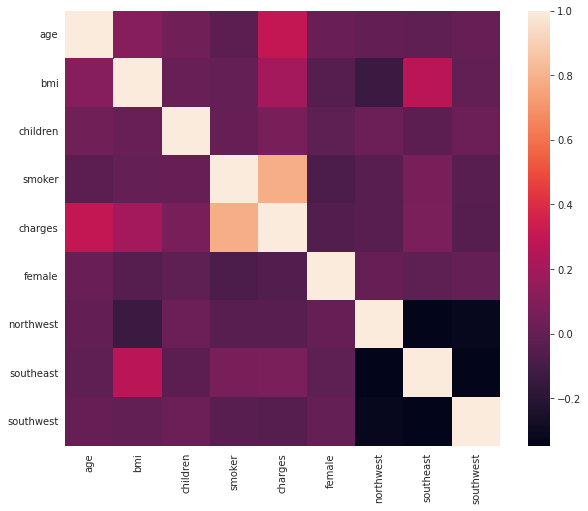

In [28]:
figura, graficos = plt.subplots(figsize=(10, 8))
corr = df_seguro.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=bool),
            square= True, ax=graficos)

**Vamos analisar se existem dados faltantes:**

In [29]:
df_seguro.isnull().sum()

age          0
bmi          0
children     0
smoker       0
charges      0
female       0
northwest    0
southeast    0
southwest    0
dtype: int64

***Vamos de Machine Learning:***

Vamos treinar o primeiro modelo em regressão linear.
utilizaremos cross validation para evitar overfit e ter uma baser de comparação para outros modelos 

In [30]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

In [34]:
from scipy.special import y1_zeros
regressao_linear = LinearRegression()

valores_rmse_rl = cross_val_score(estimator=regressao_linear,
                                  X=X_treino,
                                  y=y_treino,
                                  cv=10,
                                  scoring='neg_root_mean_squared_error')
valores_rmse_rl

array([-6073.99997254, -6580.87166754, -5233.82683473, -6045.25239632,
       -5836.4647871 , -6127.43525895, -7281.08373608, -6321.52706355,
       -6193.3145481 , -5637.06299714])

In [35]:
valores_rmse_rl = valores_rmse_rl * -1
valores_rmse_rl

array([6073.99997254, 6580.87166754, 5233.82683473, 6045.25239632,
       5836.4647871 , 6127.43525895, 7281.08373608, 6321.52706355,
       6193.3145481 , 5637.06299714])

In [36]:
media_rmse_rl = valores_rmse_rl.mean()
media_rmse_rl

6133.0839262055

***Tentaremos com árvore de regressão***

In [53]:
from sklearn.tree import DecisionTreeRegressor

arvore_regressao = DecisionTreeRegressor()

valores_rmse_arvore = cross_val_score(estimator=arvore_regressao, 
                                      X=X_treino,
                                      y=y_treino,
                                      cv=10,
                                      scoring='neg_root_mean_squared_error')
valores_rmse_arvore                                    

array([-6558.15102752, -7723.37766204, -6755.25166211, -7143.41134725,
       -6826.70582081, -5640.9734609 , -7187.51206076, -7161.66744353,
       -6351.96257144, -6143.90009265])

In [40]:
valores_rmse_arvore = valores_rmse_arvore * -1

In [41]:
media_rmse_arvore = valores_rmse_arvore.mean()
media_rmse_arvore

6826.020044918201

Vamos tirar as colunas de regiões pois na análise de correlação não mostarm influencia na variável **target** 

In [43]:
X_treino.columns

Index(['age', 'bmi', 'children', 'smoker', 'female', 'northwest', 'southeast',
       'southwest'],
      dtype='object')

In [45]:
colunas_regiao = ['northwest', 'southeast', 'southwest']
valores_rmse_rl_sem_regiao = cross_val_score(estimator=regressao_linear,
                                             X=X_treino.drop(colunas_regiao, axis=1),
                                             y=y_treino,
                                             cv=10,
                                             scoring='neg_root_mean_squared_error')
valores_rmse_rl_sem_regiao.mean() * -1

6121.545062597132

In [49]:
valores_rmse_rl_sem_regiao = valores_rmse_rl_sem_regiao.mean() * -1

In [46]:
colunas_regiao = ['northwest', 'southeast', 'southwest']
valores_rmse_arvore_sem_regiao = cross_val_score(estimator=arvore_regressao,
                                             X=X_treino.drop(colunas_regiao, axis=1),
                                             y=y_treino,
                                             cv=10,
                                             scoring='neg_root_mean_squared_error')
valores_rmse_arvore_sem_regiao.mean() * -1

6893.323535534715

In [47]:
valores_rmse_arvore_sem_regiao = valores_rmse_arvore_sem_regiao.mean() * -1

Text(0.5, 1.0, 'Comparação de RMSE')

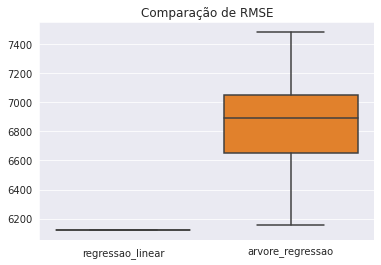

In [51]:
rmse = pd.DataFrame({'regressao_linear' :valores_rmse_rl_sem_regiao, 'arvore_regressao':valores_rmse_arvore})
sns.boxplot(data=rmse).set_title("Comparação de RMSE")


**Modelo Campeão**
Agora treinaremos o modelo campeão na base de treinamento 

In [54]:
regressao_linear.fit(X_treino.drop(colunas_regiao, axis=1), y_treino)

LinearRegression()

In [55]:
regressao_linear.coef_

array([[1.18251723e+04, 1.21744207e+04, 2.13627215e+03, 2.36539033e+04,
        7.95178837e+00]])

In [57]:
df_coeficientes = pd.DataFrame(regressao_linear.coef_)
df_coeficientes.columns=regressao_linear.feature_names_in_
df_coeficientes

,age,bmi,children,smoker,female
0,11825.17,12174.42,2136.27,23653.90,7.95


In [58]:
import statsmodels.api as sm 


rl_statsmodels = sm.OLS(y_treino,X_treino.drop(colunas_regiao, axis=1))
resultado_fit = rl_statsmodels.fit()
p_valores = resultado_fit.summary2().tables[1] ['P>|t|']
p_valores

age        0.00
bmi        0.00
children   0.07
smoker     0.00
female     0.21
Name: P>|t|, dtype: float64

Agora temos o modelo final e faremos as inferências.

In [59]:
precos_preditos = regressao_linear.predict(X_teste.drop(colunas_regiao, axis=1))
precos_preditos[:5]

array([[ 8554.81711589],
       [ 6973.58746745],
       [36798.60416104],
       [ 9417.88282303],
       [26871.68031081]])

In [60]:
len(precos_preditos)

268

In [61]:
y_teste.head()

,charges
764,9095.07
887,5272.18
890,29330.98
1293,9301.89
259,33750.29


In [62]:
predicoes_vs_real = pd.DataFrame({'predicao' : precos_preditos.flatten(), 'real' :y_teste.values.flatten()})
predicoes_vs_real['diferenca_abs'] = abs(predicoes_vs_real['predicao'] - predicoes_vs_real['real'])
predicoes_vs_real.head(20)

,predicao,real,diferenca_abs
0,8554.82,9095.07,540.25
1,6973.59,5272.18,1701.41
2,36798.60,29330.98,7467.62
3,9417.88,9301.89,115.99
4,26871.68,33750.29,6878.61
5,11097.38,4536.26,6561.12
6,145.28,2117.34,1972.06
7,16746.17,14210.54,2535.63
8,747.53,3732.63,2985.09
9,11153.68,10264.44,889.23


In [64]:
from sklearn.metrics import r2_score

r2_score(y_true=y_teste, y_pred=precos_preditos)

0.7811302113434095

Testando a predição com imputs

In [74]:
idade = input()

20


In [75]:
indice_massa_corporal = input()

35


In [77]:
criancas = input()

1


In [78]:
fumante = input(" 1 para fumante, 0 para não fumante:")

 1 para fumante, 0 para não fumante:1


In [79]:
sexo = input(" 1 para mulher, 0 para não homem:")

 1 para mulher, 0 para não homem:0


In [80]:
features = [[idade, indice_massa_corporal, criancas, fumante, sexo, 1, 1, 1]]

features = scaler.transform(features)
features

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  "X does not have valid feature names, but"


array([[0.04347826, 0.51224105, 0.2       , 1.        , 0.        ,
        1.        , 1.        , 1.        ]])

In [81]:
features

array([[0.04347826, 0.51224105, 0.2       , 1.        , 0.        ,
        1.        , 1.        , 1.        ]])

In [87]:
features = features[:,:-3]
features

array([], shape=(1, 0), dtype=float64)

In [ ]:
regressao_linear.predict(features)